# Проект: исследование продаж компьютерных игр

# Фабула проекта:

**Заказчик:** Интернет-магазин «Стримчик», продаёт компьютерные игры по всему миру.

**Данные:** Исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель исследования:** Выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Задачи исследования:**
 1. Провести исследовательский анализ данных:
  - Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
  - Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Определить за какой характерный срок появляются новые и исчезают старые платформы?
  - Определить, какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ. Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывать в работе данные за предыдущие годы.
  - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
  - Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
  - Соотнести выводы с продажами игр на других платформах.
  - Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
 2. Составить портрет пользователя каждого региона.
Нобходимо определить для пользователя каждого региона (NA, EU, JP):
  - Самые популярные платформы (топ-5). Описать различия в долях продаж.
  - Самые популярные жанры (топ-5). Пояснить разницу.
  - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
 3. Проверить гипотезы:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**План исследования:**
 - Шаг 1. Открыть файл с данными и изучить общую информацию
 - Шаг 2. Подготовить данные
 - Шаг 3. Провести исследовательский анализ данных
 - Шаг 4. Составить портрет пользователя каждого региона
 - Шаг 5. Проверить гипотезы
 - Шаг 6. Написать общий вывод

## Шаг. Изучение данных

In [ ]:
# импортируем необходимые для работы библиотеки
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import stats as st

In [ ]:
# загружаем в датафрейм данные из файла
data = pd.read_csv('/datasets/games.csv')

In [ ]:
# выведем на экран первые пять строк датафрейма
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# выведем на экран случайные пять строк датафрейма
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2217,Crash City Mayhem,GBA,2004.0,Racing,0.67,0.25,0.00,0.02,NaN,NaN,NaN
14563,Charlie Blasts Territory,N64,1999.0,Action,0.02,0.01,0.00,0.00,NaN,NaN,NaN
12194,Chuugaku Eitango Target 1800 DS,DS,2006.0,Misc,0.00,0.00,0.07,0.00,NaN,NaN,NaN
4744,Harry Potter and the Deathly Hallows - Part 1,DS,2010.0,Action,0.19,0.18,0.00,0.04,56.0,6,E10+
5262,Tiger Woods PGA Tour 14,X360,2013.0,Sports,0.21,0.12,0.00,0.03,77.0,6.2,E


In [ ]:
# выведем на экран последние пять строк датафрейма
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [ ]:
# выведем на экран общую информацию по датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# выведем на экран информацию о количества пропусков в каждом столбце
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
# с помощью цикла выведем на экран информацию о процентном соотношении пропусков
for p in ['Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating']:
    print(f'В столбце {p} доля пропусков: {(data[p].isnull().sum() / len(data[p])*100).round(3)}%')

В столбце Name доля пропусков: 0.012%
В столбце Year_of_Release доля пропусков: 1.609%
В столбце Genre доля пропусков: 0.012%
В столбце Critic_Score доля пропусков: 51.319%
В столбце User_Score доля пропусков: 40.09%
В столбце Rating доля пропусков: 40.479%


In [ ]:
# выведем на экран информацию о количестве явных дубликатов
data.duplicated().sum()

0

In [ ]:
# с помощью цикла посмотрим перечень уникальных значений в четырех столбцах
for c in ['Platform', 'Year_of_Release', 'Genre', 'Rating']:
    print(f'{c} : {data[c].unique()}')

Platform : ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Year_of_Release : [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Genre : ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Rating : ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


**Вывод**

 - Видим, что у нас датафрейм из 16715 строк.
 - Наименования столбцов имеют неверный регистр.
 - Имеются пропуски в следующих столбцах:
  - Name - 2 пропуска - 0.012%
  - Year_of_Release - 269 пропусков - 1.609%
  - Genre - 2 пропуска - 0.012%
  - Critic_Score - 8578 пропусков - 51.319%
  - User_Score - 6701 пропусков - 40.09%
  - Rating - 6766 пропусков - 40.479%
 - Дубликатов нет
 - Имеются неверные форматы данных
 - В столбце User_Score смешанные данные, как числовые, так и строчные - 'tbd'. TBD абрревиатура от фразы 'To Be Determined', означает, что рейтинг еще не определен, то есть фактически аналог пропуска данных.
 - В столбцах Platform, Year_of_Release, Genre, Rating неявных дубликатов не выявлено. Поиск неявных дубликатов в столбце Name пока кажется нецелесообразным - вручную мы это сделать не сможем - слишком много записей, как определить формальные признаки таких дубликатов пока не понятно.

### Переименование столбцов

In [ ]:
# понизим регистр в назвниях колонок
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

Строки с пропусками в столбце name можно удалить - их мало и они не влияют на выборку. Для начала выведем эти строки на экран, есть подозрение что и пропуски в столбце genre тоже связаны с этими пропусками

In [ ]:
# выведем на экран список строк с пропусками в названии
data[(data['name'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так и есть. Удалив пропуски в столбце name, мы сразу же удалим и пропуски в столбце genrе

In [ ]:
# удалим строки с пропусками в названии игры
data = data.dropna(subset=['name'])

Изучим пропуски в столбце year_of_release

In [ ]:
# выведем на экран строки с пропусками в годе релиза
data[(data['year_of_release'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим, что пропуски в year_of_release связанны с технической ошибкой, возможно сбой в процессе выгрузки данных, так как годы релиза этих игр самые разнообразные. Поскольку пропусков чуть больше полутора процентов, то тоже можем их удалить - они не повлияют на результаты исследования

In [ ]:
# удалим строки с пропусками в годе релиза
data = data.dropna(subset=['year_of_release'])

У нас остались пропуски в столбцах critic_score - 51.319%, user_score - 40.09%, rating - 40.479%
Можно предположить, что пропуски данных в этих столбцах связаны со старыми играми, когда не было практики присваивания рейтинга, оценки игроков и оценки критиков. Проверим гипотезу выведением таблицы по совпадению пропусков по всем трем параметрам

In [ ]:
# выведем на экран строки с пропусками в нескольких столбцах одновременно: рейтин, оценка критиков, оценка игроков
data[(data['rating'].isna() & data['critic_score'].isna() & data['user_score'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим, что львиная доля пропусков в этих столбцах сопровождается и пропусками в других столбцах, однако игры с пропусками были выпущены в разные годы от 1985 до 2016, так что, скорее всего, мы имеем дело с технической ошибкой выгрузки данных.

Поскольку столбец rating содержит строчные данные, то все пропуски мы заменим значением 'unk' - сокращение от слова 'unknown' - 'неизвестно'

Столбцы critic_score и user_score содержат числовые значения, к сожалению ни медианное, ни среднее значения тут не подходят, так как это исказит данные по оценкам - оценки выставляют на основании субъективного мнения и какой-то математической зависимости в их величине нет, поэтому их стоит заполнить явно аномальным значением. Значение '0' не подходит - есть риск наличия такой оценки, заменим на отрицательное значение '-1'

In [ ]:
# заполним пропуски в столбцах с рейтингом и оценка выбранными значениями
data['rating'] = data['rating'].fillna('unk')
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
# проверим остатки пропусков
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Видим, что пропусков не осталось.

Поскольку значения 'tbd', это фактически тоже пропуски, заменим все эти значения также на '-1'

In [ ]:
# заменим tbd на выбранное условное значение
data.replace('tbd', -1, inplace=True)

### Приведение в норму форматов данных

In [ ]:
# одной командой приведем в порядок форматы данных в нескольких столбцах
data = data.astype({'name': str, 'platform': str, 'year_of_release': int, 'genre': str, 'user_score': float, 'rating': str})

In [ ]:
# выведем на экран описание типов данных в столбцах
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [ ]:
# проверим корректность замены на первых пяти строках
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unk
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unk


Все форматы приведены в порядок переходим к следующему этапу

### Выявление неявных дубликатов

После приведения в порялок форматы мы модем вернуться к вопросу о выявлении неявных дубликатов. Поиск дубликатов по столбцу 'name' нецелесообразен, так как одна и та же игра могла выходить в разные годы на разных платформах, но если совместить данные по столбцам 'name' + 'platform' + 'year_of_release', то можно выявить упоминание одной и той же игры

In [ ]:
# посчитаем количество дубликатов с сочетанием одинакового названия, платформы и года выпуска
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

Видим, что есть один дубликат. Удалим его и обновим индексы

In [ ]:
# удалим дубликат и обновим индексы
data = data.drop_duplicates(['name', 'platform', 'year_of_release'])
data = data.reset_index(drop=True)

### Добавление столбца с суммой продаж

In [ ]:
# добавим столбец с итоговой суммоу продаж по всем регионам
data.insert(8, 'sum_sales', (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']))
# проверим корректность дбавленной информации
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,sum_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,-1.0,-1.0,unk
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,-1.0,-1.0,unk
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,-1.0,-1.0,unk
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,-1.0,-1.0,unk
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,-1.0,-1.0,unk
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,-1.0,-1.0,unk


Столбец успешно добавлен, можем переходить к исследовательскому анализу

**Вывод**

По итогу подгтовки данных проведены следующие операции:
 - Явные дубликаты не обнаружены.
 - Выявлени и удален один неявный дубликак при одновременной совпадении значений по столбцам'name', 'platform', 'year_of_release'
 - В столбце 'name' удалены 2 строки с пропусками
 - В столбце 'year_of_release' удалены 269 строк с пропусками
 - Пропуски в столбце 'critic_score' имеют критичное значение они заменены на условное обзначение '-1'
 - Пропуски в столюце 'user_score' имеют критичное значение они заменены на условное обзначение '-1'
 - Пропуски в столбце 'rating' имеют критичное значение они заменены на условное обзначение 'unk' (unknown - неизвестно)
 - значения 'tbd' имеют критичное значение и они тоже заменены на условное обзначение '-1'
 - Столбцы приведены к подходящему формату данных, в соответствии с содержимым.
 - Суммарные продажи во всех регионах записали посчитаны и помещены в столбец в 'sum_sales'

В целом много пропусков в ажных местах, без логического объяснения их появления, необходимы вяснить каким образом собирался датасет, возможно это технический сбой в работе парсера.

## Шаг. Исследовательский анализ данных

### Задача: Изучить сколько игр выпускалось в разные годы

In [ ]:
# выведем статистические данные по столбцу с годом выпуска игр
data['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

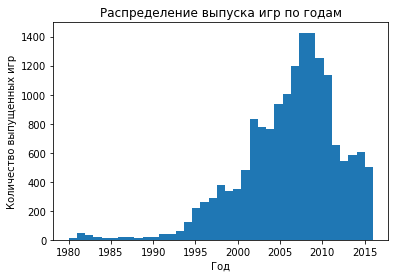

In [ ]:
# построим гистограмму с распределением выпуска игр по годам
plt.hist(data['year_of_release'], bins=37, range=(1980, 2016))
plt.title('Распределение выпуска игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.show()

<AxesSubplot:title={'center':'Распределение выпуска игр по годам'}, xlabel='Год', ylabel='Количество игр'>

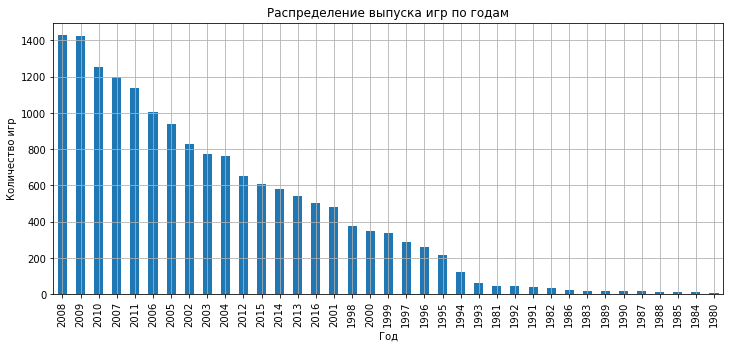

In [ ]:
# отсортируем информацию и выведем в виде столбчатой диаграммы
(data['year_of_release']
    .value_counts(ascending=False)
    .plot(
        title='Распределение выпуска игр по годам',
        ylabel='Количество игр',
        xlabel='Год',
        kind = 'bar',
        grid=True,
        figsize = (12, 5)))

**Вывод:**

Видим, что больше всего игр выпускалось в 2008 и 2009 годах, при этом за период с 1980 по 1993 год их выпускалось совсем небольшое количество, так что этим периодом можно пренебречь - он не повлияет на аналитику данных по годам. В целом с 1993 год происходил рост количества выпусков новых игр - это как раз период активного развития игровых консолей и PС но в 2012 году произошел спад и до 2016 года, общее количеств выпусков варьировалось без резких спадов или скачков. С этого периода в основном развивается мобидльный геминг, кроме того как игровые консоли, так и игровые PC перестают быть широко доступными по причине дроговизны. Так что, в дальнейшем при анализе будем брать именно эти последние три года - 2013-2016

### Задача: Изучить, как менялись продажи по платформам

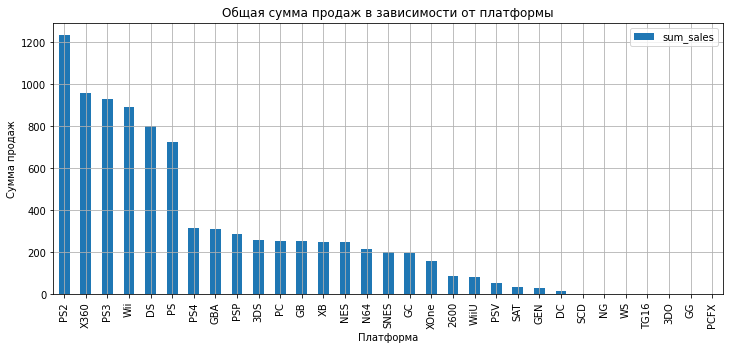

In [ ]:
# построим стобчатую диаграмму на основе сводной таблицы
(data.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
    .plot(kind='bar', grid=True, figsize=(12, 5)))

plt.title('Общая сумма продаж в зависимости от платформы')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

Видим, что больше всего выручки принесл продажи игра для PS2, но также в топе у нас и такие платформы как X360, PS, PS3, Wii, DS. Именно по ним будем смотреть распределение по годам.

In [ ]:
# соберем сводную таблицу с распределением по годам по тооповым платформам
top_platform = (data[data['platform']
                    .isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])]
                    .pivot_table(index=('platform', 'year_of_release'), values='sum_sales', aggfunc='sum'))
top_platform

sum_sales
platform year_of_release           
DS       1985                  0.02
         2004                 17.27
         2005                130.14
         2006                119.81
         2007                146.94
...                             ...
X360     2012                 99.74
         2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52

[67 rows x 1 columns]

Видим странную аномали в Нинтендо DS - эта платформа появилась в 2004 году и в 1985 году у нее не могло быть продаж. Необходимо проверить эту строку

In [ ]:
# выведем на экран выброс по DS
data.query('platform == "DS" & year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,sum_sales,critic_score,user_score,rating
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.02,-1.0,-1.0,unk


Видим явную ошибку - эта игра появилась в 2010 году и не могда выйти в релиз в 1985. Но по этой игре в принципе в сети почти нет информации, так что просто удалим строку

In [ ]:
# удалим строку по значению индекса и обновим индексы
data = data.drop(index = 15704)
data = data.reset_index(drop=True)

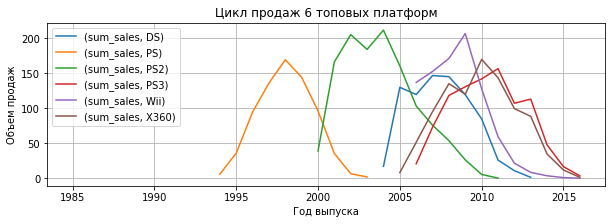

In [ ]:
# построим сводную линейную диаграмму по топовым платформам
top_platform.unstack(level=0).plot(rot=0, grid=True, figsize=(10, 3))
plt.title('Цикл продаж 6 топовых платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Объем продаж')
plt.legend()
plt.show()

Видим, что разные платформы были популярны в разные периоды времени и периодически сменяли друг друга. Наибольшее разнообразие топовых консолей пришлось на 2005-2016 годы. Посчитаем срок жизни каждой платформы в виде разницы между первым годом выпуска игр и последним

In [ ]:
# создадим переменную, куда поместим таблицу с данными по самым ранним и поздним годам выпуска игр для топовых платформ
platform_life = (data[data['platform']
                      .isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])]
                      .pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
                      .reset_index())
platform_life.columns = ['platform', 'start_year', 'fin_year']
# добавим столбец с расчетом срока жизни платформы
platform_life['lifespan'] = platform_life['fin_year'] - platform_life['start_year']
platform_life

,platform,start_year,fin_year,lifespan
0,DS,2004,2013,9
1,PS,1994,2003,9
2,PS2,2000,2011,11
3,PS3,2006,2016,10
4,Wii,2006,2016,10
5,X360,2005,2016,11


Сформировав таблицу с минимальными и максимальными датами релиза игр для топовых консолей, мы увидели что их срок жизни варьируется от 9 до 11 лет, Так что в среднем игровые консоли живут 10 лет. Для повышения продаж, нам необходимо взять платформы, которые появились не более 3 лет назад, так как они находятся в фазе роста и еще не достгли пиковых продаж.

### Задача: Определить несколько потенциально прибыльных платформ.

Сперва определим какая дата информации в нашем датафрейме самая поздняя

In [ ]:
# выведем максимальное значение года выпуска игр
data['year_of_release'].max()

2016

Самый поздний год в нашем датафрейме 2016, поэтому возьмем период с 2013 года, чтобы была видна динамика

In [ ]:
# построим таблицу с данными по суммам количества проданных игр после 2013 года
top_sale_platform = (data
                 .query('year_of_release > 2013')
                 .pivot_table(index='platform', values='sum_sales', aggfunc='sum')
                 .sort_values(by='sum_sales', ascending=False))
top_sale_platform

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


 Видим что самые высокие продажи на сегодняшний день у 5 платформ: PS4, PS3, XOne, 3DS и X360, но нам важно увидеть не только топове положение на рынке но и перспективу роста. Посмотрим состояние на графике.

In [ ]:
# создадим сводную таблицу для построения сводного графика
prom_platform = (data
                 .query('year_of_release > 2013')
                 .pivot_table(index=('platform', 'year_of_release'), values='sum_sales', aggfunc='sum'))
prom_platform

sum_sales
platform year_of_release           
3DS      2014                 43.76
         2015                 27.78
         2016                 15.14
PC       2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2014                100.00
         2015                118.90
         2016                 69.25
PSP      2014                  0.24
         2015                  0.12
PSV      2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2014                 54.07
         2015                 60.14
         2016                 26.15

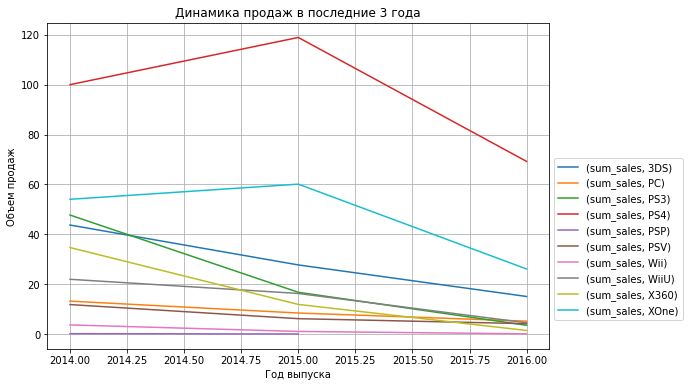

In [ ]:
# выведем данные сводной таблицы в виде сводного линейного графика
prom_platform.unstack(level=0).plot(rot=0, grid=True, figsize=(9, 6))
plt.title('Динамика продаж в последние 3 года')
plt.xlabel('Год выпуска')
plt.ylabel('Объем продаж')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

На самом деле все изучаемые платформы у нас находятся на этапе упадка, более менее персективными видятся только PS4 и XOne - они хотя бы максимально близки к пиковым продажам, а значит имеют перспективу существования еще около 4-5 лет. посмотрим какие платформы у нас самые молодые, и имеют запас срока жизни

In [ ]:
# соберем таблицу с данными о первом годе выпуска игр для платформ
platform_life = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min']).reset_index()
platform_life.columns = ['platform', 'start_year']
platform_life.sort_values(by='start_year', ascending=False).head()

,platform,start_year
30,XOne,2013
18,PS4,2013
27,WiiU,2012
2,3DS,2011
20,PSV,2011


Действительно, самые молодые платформы это PS4 и XOne - они не старше 3-х лет, а значит еще имеют наибольший запас срока жизни. К тому же мы уже наблюдали у некторых популярных платформ скачкообразный рост, а значит и текущее падение продаж может быть снижением перед таким же скачком. С ними и будем работать.

### Задача: Построить график boxplot по глобальным продажам игр в разбивке по платформам

In [ ]:
# соберем сводную таблицу для построения сводного boxplot-а
data.query('year_of_release > 2013').pivot_table(index=('platform', 'year_of_release'), values='sum_sales', aggfunc='sum')

sum_sales
platform year_of_release           
3DS      2014                 43.76
         2015                 27.78
         2016                 15.14
PC       2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2014                100.00
         2015                118.90
         2016                 69.25
PSP      2014                  0.24
         2015                  0.12
PSV      2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2014                 54.07
         2015                 60.14
         2016                 26.15

(0.0, 2.0)

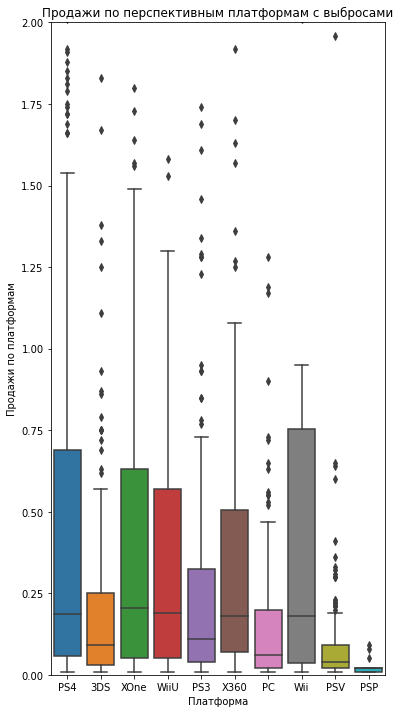

In [ ]:
# построим сводный график всех boxplot-в
plt.figure(figsize=(6, 12)) # специально растянул по вертикали, чтобы лучше было видно распределение
sb.boxplot(data=(data.query('year_of_release > 2013')), x='platform', y='sum_sales')
plt.title('Продажи по перспективным платформам с выбросами')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам')
plt.ylim(0, 2)

In [ ]:
# выведем статистическую информацию по суммарному количесту продаж
data.query('year_of_release >= 2013')['sum_sales'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: sum_sales, dtype: float64

Мы видим очень сильные выбросы по продажам игр разных платформ и сильное смещение разброса цен к третьему квартилю. Медианное значение продаж находится на отметке 110 000 тысяч, а максимальное - 21 млн проданных копий. Посмотрим отдельно информацию по 2016 году.

(0.0, 2.0)

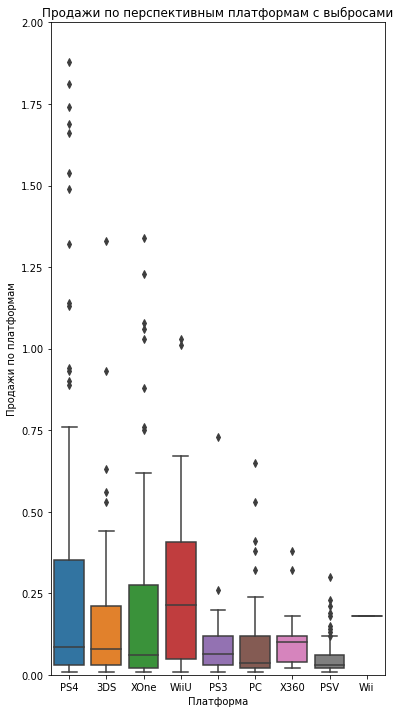

In [ ]:
# аналогично построим сводный график распределения по 2016 году, чтобы увидеть текущее положение по продажам
plt.figure(figsize=(6, 12))
sb.boxplot(data=(data.query('year_of_release == 2016')), x='platform', y='sum_sales')
plt.title('Продажи по перспективным платформам с выбросами')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам')
plt.ylim(0, 2)

In [ ]:
# выведем статистику по 2016 году
data.query('year_of_release == 2016')['sum_sales'].describe()

count    502.000000
mean       0.258845
std        0.698041
min        0.010000
25%        0.020000
50%        0.060000
75%        0.200000
max        7.600000
Name: sum_sales, dtype: float64

**Вывод:**

Мы видим немного уменьшившиеся разбросы в 2016 году по сравнению с выборкой по периоду с 2013 года. Тем не менее, активне разбросы остались только по PS4, 3DS, XOne, и WiiU. Медианное значение продаж сместилось до отметки 60 000, а максимальное до 7,6 млн проданных копий. При этом самое высокое медианное значение проданных копий у платформы WiiU. Не смотря на низкий тренд продаж игр по этой платформе, возможно, ориентируясь на медиану по 2016 году, тоже стоит ее учесть как перспективную - она показывает довольно высокую стабильность продаж по медианному значению, хоть и без ярких выбросов

### Задача: Определить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Для этой задачи мы посмотрим корреляцию на наших трех перспективных платформах (PS4, XOne и WiiU).

**Платформа PS4**

0.3

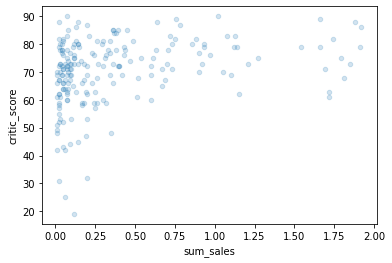

In [ ]:
# построим график рассеяния с фильтром по условным обозначениям и отсечкой выбросов
(data
    .query('platform == "PS4" & year_of_release > 2013 & critic_score > -1 & sum_sales < 2')
    .plot(x='sum_sales', y='critic_score', kind='scatter', alpha=0.2))
# выведем коэффициент корреляции
(data
    .query('platform == "PS4" & year_of_release > 2013 & critic_score > -1 & sum_sales < 2')['sum_sales']
    .corr(data.query('platform == "PS4" & year_of_release > 2013 & critic_score > -1 & sum_sales < 2')['critic_score'])
    .round(2))

-0.02

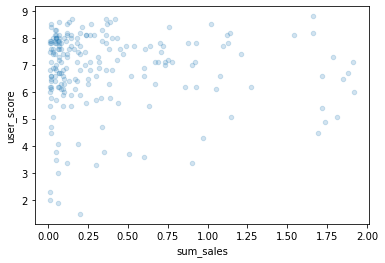

In [ ]:
# построим график рассеяния с фильтром по условным обозначениям и отсечкой выбросов
(data
    .query('platform == "PS4" & year_of_release > 2013 & user_score > -1 & sum_sales < 2')
    .plot(x='sum_sales', y='user_score', kind='scatter', alpha=0.2))
# выведем коэффициент корреляции
(data
    .query('platform == "PS4" & year_of_release >= 2013 & user_score > -1 & sum_sales < 2')['sum_sales']
    .corr(data.query('platform == "PS4" & year_of_release > 2013 & user_score > -1 & sum_sales < 2')['user_score'])
    .round(2))

Тут мы видим, что в целом корреляция с отзывами довольно низкая, но по корреляции с отзывами игроков PS4 еще и отрицательная, хоть и близкая к 0. Возможно был всплеск продаж "мусорных" игр для платформы, с негативными оценками игроков, что и привело к небольшой отрицательной корреляции

**Платформа XOne**

0.46

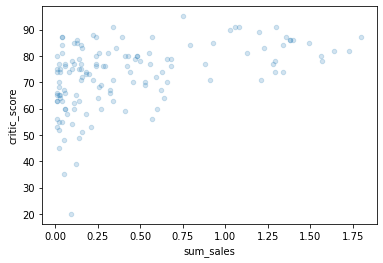

In [ ]:
# построим график рассеяния с фильтром по условным обозначениям и отсечкой выбросов
(data
    .query('platform == "XOne" & year_of_release > 2013 & critic_score > -1 & sum_sales < 2')
    .plot(x='sum_sales', y='critic_score', kind='scatter', alpha=0.2))
# выведем коэффициент корреляции
(data
    .query('platform == "XOne" & year_of_release > 2013 & critic_score > -1 & sum_sales < 2')['sum_sales']
    .corr(data.query('platform == "XOne" & year_of_release > 2013 & critic_score > -1 & sum_sales < 2')['critic_score'])
    .round(2))

0.09

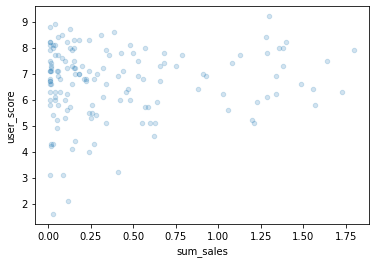

In [ ]:
# построим график рассеяния с фильтром по условным обозначениям и отсечкой выбросов
(data
    .query('platform == "XOne" & year_of_release > 2013 & user_score > -1 & sum_sales < 2')
    .plot(x='sum_sales', y='user_score', kind='scatter', alpha=0.2))
# выведем коэффициент корреляции
(data
    .query('platform == "XOne" & year_of_release > 2013 & user_score > -1 & sum_sales < 2')['sum_sales']
    .corr(data.query('platform == "XOne" & year_of_release > 2013 & user_score > -1 & sum_sales < 2')['user_score'])
    .round(2))

XOne показывает уже довольно высокую корреляцию с оценками критиков, но крайне низкую корреляцию с оценками игроков. Возможно речь идет о "закупках" отзывов у критиков и итоговом разочаровании игроков

**Платформа WiiU**

0.36

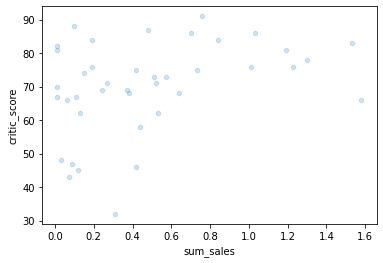

In [ ]:
# построим график рассеяния с фильтром по условным обозначениям и отсечкой выбросов
(data
    .query('platform == "WiiU" & year_of_release > 2013 & critic_score > -1 & sum_sales < 2')
    .plot(x='sum_sales', y='critic_score', kind='scatter', alpha=0.2))
# выведем коэффициент корреляции
(data
    .query('platform == "WiiU" & year_of_release > 2013 & critic_score > -1 & sum_sales < 2')['sum_sales']
    .corr(data.query('platform == "WiiU" & year_of_release > 2013 & critic_score > -1 & sum_sales < 2')['critic_score'])
    .round(2))

0.39

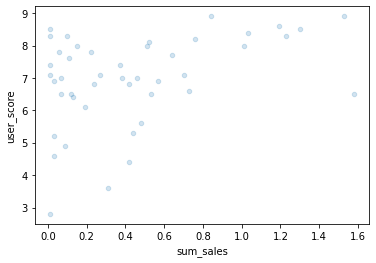

In [ ]:
# построим график рассеяния с фильтром по условным обозначениям и отсечкой выбросов
(data
    .query('platform == "WiiU" & year_of_release > 2013 & user_score > -1 & sum_sales < 2')
    .plot(x='sum_sales', y='user_score', kind='scatter', alpha=0.2))
# выведем коэффициент корреляции
(data
    .query('platform == "WiiU" & year_of_release > 2013 & user_score > -1 & sum_sales < 2')['sum_sales']
    .corr(data.query('platform == "WiiU" & user_score > -1 & sum_sales < 2')['user_score'])
    .round(2))

А вот WiiU снова удивила - она показывает не только стабильность продаж, пусть и не самые высокие результаты, но и еще относительно высокую корреляцию с оценками игроков и критиков, причем у оценок игроков корреляция выше. Видимо тут сформировалась своя ниша и свой фэндом игроков, которые друг другу доверяют больше чем критикам. Однозначно выбирать эту платформу было хорошим решением, пусть и не в качестве флагманской, с точки зрения коммерции.

**Вывод:**
    
В целом мы видим что определенная корреляция между оценками игроков и критиков с объемами прлдаж в количестве экземпляров есть. И, как правило, корреляция с оценками критиков выше, чем с оценками игроков. При этом видно что у "старичков" корреляция выше чем у "новичков", которые еще не набрали пика популярности и не собрали большую массу оценок. При этом есть и свои особеннгси у разных платформ - где то корреляция выше, где-то ниже, а где-то есть и своя специфика (WiiU). Все эти нюансы надо учитывать при выборе приоритетных платформ для продажи игр.

### Задача: Изучить общее распределение игр по жанрам

Для изучения распределения игр по жанрам построим столбчатую гистограмму с сортирвкой по популярности

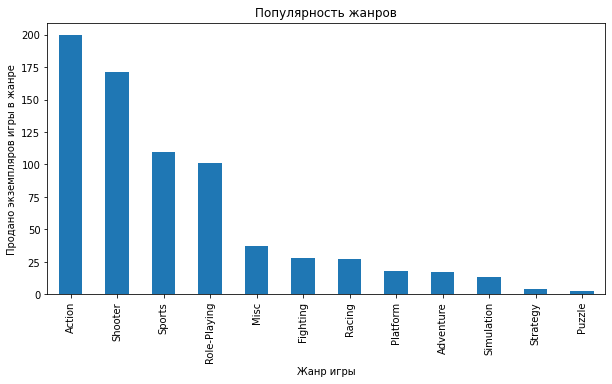

In [ ]:
# построим отсортиованный столбчатый график
(data
    .query('year_of_release > 2013')
    .pivot_table(index='genre', values='sum_sales', aggfunc='sum')
    .sort_values('sum_sales', ascending=False)
    .plot(kind='bar', y='sum_sales', figsize=(10, 5), legend = False, title = 'Популярность жанров')
    .set(xlabel='Жанр игры', ylabel='Продано экземпляров игры в жанре'))

plt.show()

(0.0, 4.0)

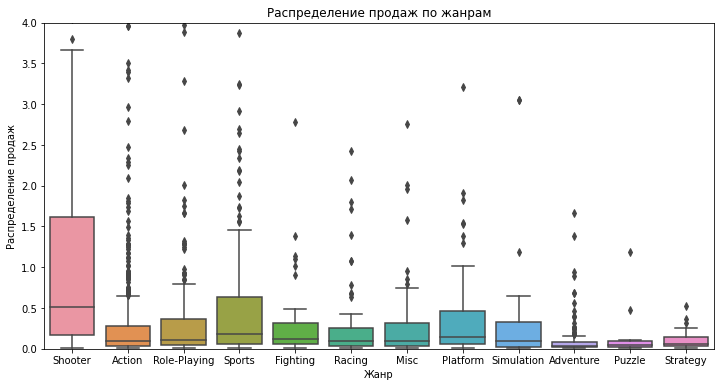

In [ ]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=(data.query('year_of_release > 2013')), x='genre', y='sum_sales')
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Распределение продаж')
plt.ylim(0, 4)

Видим что игры в жанре экшн самые популярные - это эволюционное развитие платформеров, которые всегда были популярны на всех видах консолей. На втором месте у нас спортивные игры (привет ФИФА и НХЛ), благодаря отдельному фандому и большому количеству соревнований, а на третьем месте у нас шутеры - еще один из популярных жанов не только для консолей, но и для ПК. Традиционно любимые игроками ранее жанры фатинга и классические платформеры в топ не попали - результат влияния трендов последних лет и активного влияния крупных франшиз в топовых жанрах.
А вот с точки зрения диаграммы распределения boxplot, самые высокие медианные показатели  у таких жанров как шутеры, платформеры, спортивные игры и файтинги

Однако, необходимо на эту ситуацию смотреть и в разрезе выбранных нами платформ

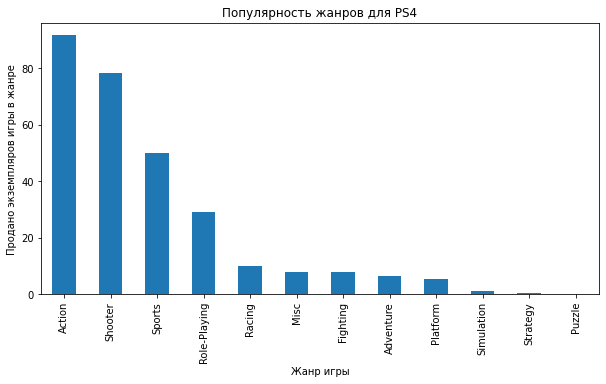

In [ ]:
# построим отсортированный столбчатый график с фильтром по значению платформы
(data
    .query('platform == "PS4" & year_of_release > 2013') # тут отсечка не нужна
    .pivot_table(index='genre', values='sum_sales', aggfunc='sum')
    .sort_values('sum_sales', ascending=False)
    .plot(kind='bar', y='sum_sales', figsize=(10, 5), legend = False, title = 'Популярность жанров для PS4')
    .set(xlabel='Жанр игры', ylabel='Продано экземпляров игры в жанре'))

plt.show()

(0.0, 4.0)

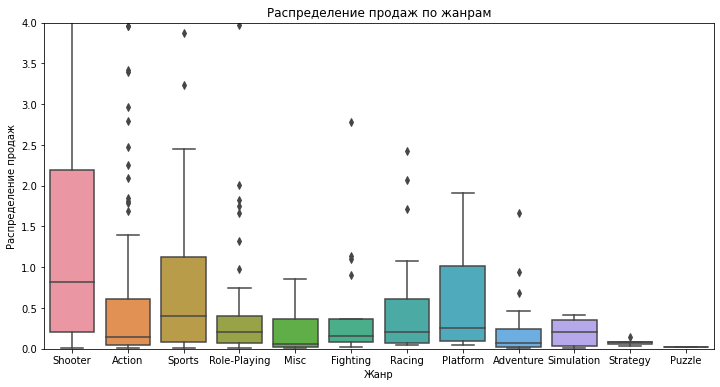

In [ ]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=(data.query('platform == "PS4" & year_of_release > 2013')), x='genre', y='sum_sales')
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Распределение продаж')
plt.ylim(0, 4)

Для PS4  самыми популярными по сумме продаж жанрами являются Экшены, Шутеры и спортивные игры. Самые высокие медианные значения у шутеров, спортивных игр и платформеров.

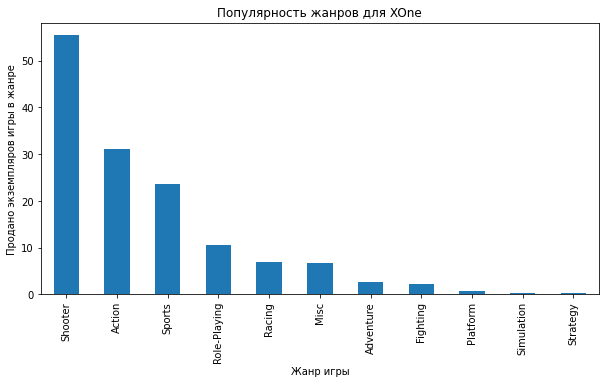

In [ ]:
# построим отсортированный столбчатый график с фильтром по значению платформы
(data
    .query('platform == "XOne" & year_of_release > 2013') # тут отсечка не нужна
    .pivot_table(index='genre', values='sum_sales', aggfunc='sum')
    .sort_values('sum_sales', ascending=False)
    .plot(kind='bar', y='sum_sales', figsize=(10, 5), legend = False, title = 'Популярность жанров для XOne')
    .set(xlabel='Жанр игры', ylabel='Продано экземпляров игры в жанре'))

plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=(data.query('platform == "XOne" & year_of_release > 2013')), x='genre', y='sum_sales')
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Распределение продаж')
plt.ylim(0, 2)

Для XOne топовые жанры те же, хотя и популярность у них немного по другому распределена: Шутеры, Экшены, Спортивные. По медианным значениям самые высокие медианные значения у Шутеров, спортивных игр и ролевых игр.

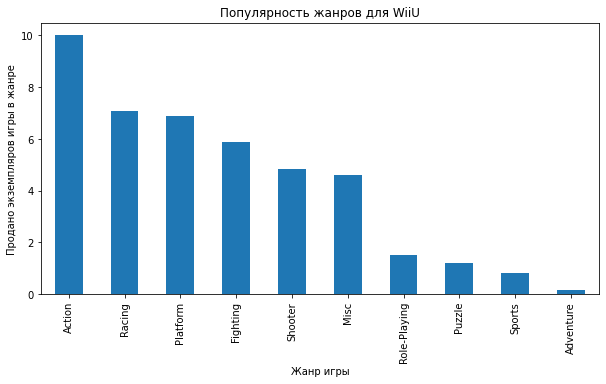

In [ ]:
# построим отсортированный столбчатый график с фильтром по значению платформы
(data
    .query('platform == "WiiU" & year_of_release > 2013') # тут отсечка не нужна
    .pivot_table(index='genre', values='sum_sales', aggfunc='sum')
    .sort_values('sum_sales', ascending=False)
    .plot(kind='bar', y='sum_sales', figsize=(10, 5), legend = False, title = 'Популярность жанров для WiiU')
    .set(xlabel='Жанр игры', ylabel='Продано экземпляров игры в жанре'))

plt.show()

(0.0, 8.0)

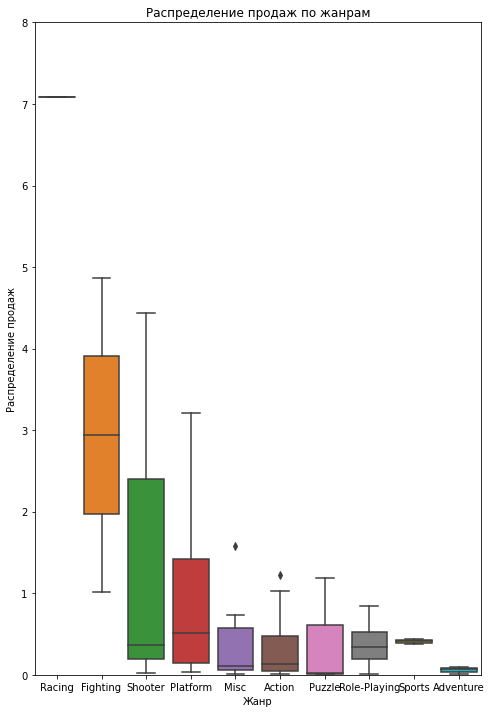

In [ ]:
plt.figure(figsize=(8, 12))
sb.boxplot(data=(data.query('platform == "WiiU" & year_of_release > 2013')), x='genre', y='sum_sales')
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Распределение продаж')
plt.ylim(0, 8)

А вот для WiiU популярность жанров несколько по другому распределена - это объясняется техническими особеностями платформы. На первом месте классические платформеры, на втором экшены, и на третьем месте игры в жанре Мiscellaneous - не вошедшие в общую классифкацию разнообразные казуальные игры. По медианным значениям самые высокие показатели гоночных симуляторов, платформеров и файтингов, правда сама "коробка" у гоночных симуляторов плоская - разброс очень маленький

### Общий вывод исследовательского анализа

В результате исследовательского анализа мы:
 - Определили что средний срок жизни платформы 10 лет (от 9 до 11) - именно на него будем ориентироваться при выстраивании плана продаж
 - На основании определения срока жизни и общего поведения продаж у платформ прошлых лет, выделили три наиболее перспективные платформы для продажи игр, с хорошим запасом срока жизни и развития продаж. Ими стали: PS4 и XOne и факультативно WiiU. WiiU была выбрана, как показывающая стабильные, предсказуемые и понятные для планирования продажи. К тому же, это нишевая платформа со своими кругом фанатов. Но именно предсказуемость и стабильность продаж, а также высокая корреляция с оценками игроков, даст хороший поток дополнительных продаж, от которого отказываться не стоит.
 - Увидели, что в целом есть корреляция между оценками критиков, оценками игроков и объемом продаваемых экземпляров. Однако у "молодых" платформ она не очень высокая и необходимо это учитывать при разработке маркетинговых активностей. Кроме того, необходимо учитывать и специфику корреляции у разных платформ.
 - В качестве топовых жанров определены: Экшены (Action), Спортивные игры (Sports) и Шутеры (Shooter), именно их мы и будем продавать в первую очередь для PS4 и XOne, а для WiiU будем делать акцент на классические платформеры, экшены и казуальные игры.

## Шаг. Составление портрета пользователя

На этом этапе нам необходимо определить для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5).
 - Самые популярные жанры (топ-5).
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

С учетом того, что ключевая цель у нас планирование продаж, составление портрета мы ограничим посленими тремя годами - нам не важна популярность платформ и жанров в прошлом, нам необходимо отпределить актуальный портрет пользователя

### Распределение платформ по регионам

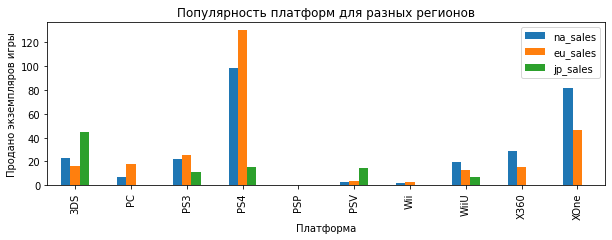

In [ ]:
# построим сводный столбчатый график с фильтром по годам
(data
    .query('year_of_release > 2013')
    .pivot_table(index='platform', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
    .plot(kind='bar', y=['na_sales', 'eu_sales', 'jp_sales'], figsize=(10, 3), title = 'Популярность платформ для разных регионов')
    .set(xlabel='Платформа', ylabel='Продано экземпляров игры'))

plt.show()

Видим, что в Европе самой популярной платформой стала японская платформа PS4, в США такая же история + добавляется родная американская XOne. В Японии же самой популярной платформой является портативная японская платформа Нинтендо 3DS.

Построим таблицы по каждому региону с выделением топ 5 платформ

In [ ]:
# выведем таблицу по США
display(data
    .query('year_of_release > 2013')
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .head())
# выведем таблицу по Европе
display(data
    .query('year_of_release > 2013')
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .head())
# выведем таблицу по Японии
display(data
    .query('year_of_release > 2013')
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .head())

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


**Вывод:**

В итоге мы видим, что:
 - в США топ 5 платформ распределены так: PS4, XOne, X360, 3DS, PS3.
 - в Европе топ 5 платформ распределены так: PS4, XOne, PS3 PC, 3DS
 - в Японии топ 5 платформ распределены так: 3DS, PS4, PSV, PS3, WiiU

Это все связано с культурными особенностями каждого региона: японцы чуть ли не живут на работе, поэтому для них мобильный гейминг более востребован - по пути на работу, с работы, в перерывах на работе. В Европе существет отдельная культура Freizeit (свободное время) - по окончании рабочего времени, каждый не просто имеет право, а должен отдыхать. Поэтому домашние консоли более востребованы. В США все не так однозначно со свобоным временем, но там тоже нет такой практики жизни на работе как в Японии.

### Распределение жанров по регионам

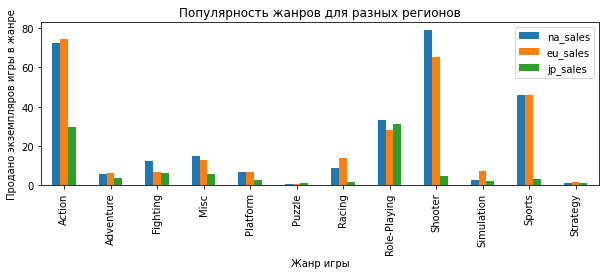

In [ ]:
# построим сводный столбчатый график с фильтром по годам
(data
    .query('year_of_release > 2013')
    .pivot_table(index='genre', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
    .plot(kind='bar', y=['na_sales', 'eu_sales', 'jp_sales'], figsize=(10, 3), title = 'Популярность жанров для разных регионов')
    .set(xlabel='Жанр игры', ylabel='Продано экземпляров игры в жанре'))

plt.show()

Видим, что в США и в Европе наиболее популярны жанры Экшен и Шутер. А вот в Японии очень любят Ролевые игры и Экшены.
Построим таблицы по каждому региону с выделением топ 5 жанров

In [ ]:
# выведем таблицу по США
display(data
    .query('year_of_release > 2013')
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .head())
# выведем таблицу по Европе
display(data
    .query('year_of_release > 2013')
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .head())
# выведем таблицу по Японии
display(data
    .query('year_of_release > 2013')
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .head())

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


**Вывод:**

В итоге мы видим, что:
 - в США топ 5 жанров распределен так: Шутеры, Экшены, Спортивные, Ролевые, Казуальные
 - в Европе топ 5 жанров распределены так: Экшены, Шутеры, Спортивные, Ролевые, Гоночные
 - в Японии топ 5 жанров распределены так: Ролевые, Экшены, Файтинги, Казуальные, Шутеры

Это тоже связано с культурными особенностями каждого региона: Европа и США очень похожи, но в Европе традиционно очень развита и очень популярна культура гонок (Формула 1, Париж-Дакар и т.п.), из-за чего гонки попали в топ 5 для Европы. Япония как и другие страны азиатского регона являются самыми массовыми потребителями MMORPG и ролевых игр в целом, поэтому они там так востребованы. К тому же Япония является родоначальником многих боевых искусств (Карате, Айкидо), из-за чего там также популярны и файтинги.
Поэтому, при продаже игр в разных регионов надо обязательно учитывать региональные предпочтения.

### Влияние рейтинга ESRB на продажи в отдельном регионе.

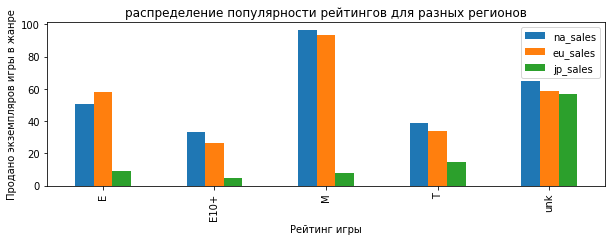

In [ ]:
# снова выведем сводную столбчатую таблицу с фильтром по годам
(data
    .query('year_of_release > 2013')
    .pivot_table(index='rating', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
    .plot(kind='bar', y=['na_sales', 'eu_sales', 'jp_sales'], figsize=(10, 3), title = 'распределение популярности рейтингов для разных регионов')
    .set(xlabel='Рейтинг игры', ylabel='Продано экземпляров игры в жанре'))

plt.show()

In [ ]:
# выведем таблицу по США
display(data
    .query('year_of_release > 2013')
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .head(3))
# выведем таблицу по Европе
display(data
    .query('year_of_release > 2013')
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .head(3))
# выведем таблицу по Японии
display(data
    .query('year_of_release > 2013')
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .head(3))

,na_sales
rating,
M,96.42
unk,64.72
E,50.74


,eu_sales
rating,
M,93.44
unk,58.95
E,58.06


,jp_sales
rating,
unk,56.90
T,14.78
E,8.94


**Вывод:**

Видим, что в Европе и США наиболее популярны игры с ограничением 17+ (М), поэтому в определеной степени можно утверждать что 17+ это основной возраст игрока в США и Европе. В Японии же наибоее популярны игры с неопределенным рейтингом - к сожалению, это не дает нам понимания возраста игрока в Японии, но на втором месте в Японии ограничения для подростков 13+ (Т). Поэтому с определенной натяжкой, но можно утрверждать что основные игроки в Японии моложе чем в США и Европе. Но кроме этого, во всех странах популярны и детские игры без возрастных ограничений.

### Общий вывод по портрету

В результате исследовательской работы мы установили, что наиболее популярные портреты игроков в США и Европе в большей степени похожи с небольшими региональными особенностями. Портрет игрока в Японии принципиально отличается от портрета игрок в США и Европе по культурным особенностям:
 - наиболее популярный портрет игрока в США это: возраст 17+, игрок на PS4 и XOne, играющий в шутеры, экшены и спортивные игры
 - наиболее популярный портрет игрока в Европе это: возраст 17+, игрок на PS4 и XOne, играющий в экшены, шутеры и спортивные игры
 - наиболее популярный потрет игрока в Японии это: возраст 13+, игрок на Nintendo 3DS и PS4, играющий в ролевые игры, экшены и файтинги

Исходя из этих вводных, имеет смысл продажи в Японии выделять отдельно от продаж в США и Европе и маркетинговые активности выделять в отдельную ветку работы.

## Шаг. Проверка гипотез

На проверку нам поставлены две гипотезы:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Фактически это означает, что нам необходимо в обоих случаях провести двусторонний тест гипотез. Только в первом случае нам нужно подтвердить нулевую гипотезу, во втором случае ее опровергнуть.

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.

Сформулируем гипотезы:
 - Н0: Средние оценки игроков платформ XOne и PC равны
 - Н1: Средние оценки игроков платформ XOne и PC не равны

In [ ]:
# выведем статистическую информацию по первой выборке
display(data.query('platform == "XOne" & year_of_release > 2013 & user_score > -1')['user_score'].describe()) # тут отсеяка не нужна
xone = np.var(data[data['platform'] == 'XOne']['user_score'])
display(f'Дисперсия выборки: {xone}')
# выведем статистическую информацию по второй выборке
display(data.query('platform == "PC" & year_of_release > 2013 & user_score > -1')['user_score'].describe()) # а тут нужна отсечка
pc =  np.var(data[data['platform'] == 'PC']['user_score'])
display(f'Дисперсия выборки: {pc}')

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

'Дисперсия выборки: 12.36705305774558'

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

'Дисперсия выборки: 12.684848441173163'

Видим, что количественно выборки отличаются. Стандартное отклонение тоже отличается: 1.38 и 1.7, как и отличается дисперсия выборки.
Поскольку речь идет о двух независимых выборках, то будем использовать соответствующий тест ***ttest_ind***. и зададим конвенциальное пороговое значение в 5%

In [ ]:
# задаем контрольное значение
alpha = 0.05
# проводим тест для двух независимых выборок
results = st.ttest_ind(
    data.query('platform == "XOne" & year_of_release > 2013 & user_score > -1')['user_score'],
    data.query('platform == "PC" & year_of_release > 2013 & user_score > -1')['user_score'],
    equal_var=False, # для различных дисперсий
    alternative='two-sided') # для двустороннего теста

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

В результате мы не отвергли нулевую гипотезу. Это означает что средние оценки игроков XOne и PC в исследуемый период если и отличаются то незначительно и могут быть признаны равными

### Гипотеза: Средние пользовательские рейтинги жанров Action  и Sports не равны.

Сформулируем гипотезы:
 - Н0: Средние оценки игроков жанров Action и Sports равны
 - Н1: Средние оценки игроков жанров Action и Sports не равны

In [ ]:
# выведем статистическую информацию по первой выборке
display(data.query('genre == "Action" & year_of_release > 2013 & user_score > -1')['user_score'].describe())
action = np.var(data[data['genre'] == 'Action']['user_score'])
display(f'Дисперсия выборки: {action}')
# выведем статистическую информацию по второй выборке
display(data.query('genre == "Sports" & year_of_release > 2013 & user_score > -1')['user_score'].describe())
sports =  np.var(data[data['genre'] == 'Sports']['user_score'])
display(f'Дисперсия выборки: {sports}')

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

'Дисперсия выборки: 17.212705268501164'

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

'Дисперсия выборки: 16.97720695837117'

Снова видим, что количественно выборки отличаются но уже не так сильно. Однако стандартное отклонение тоже отличается: 1.37 и 1.85, как и отличается дисперсия выборки.
Поскольку речь идет о двух независимых выборках, то будем использовать соответствующий тест ***ttest_ind***.

In [ ]:
# задаем контрольное значение
alpha = 0.05
# проводим тест для двух независимых выборок

results = st.ttest_ind(
    data.query('genre == "Action" & year_of_release > 2013 & user_score > -1')['user_score'],
    data.query('genre == "Sports" & year_of_release > 2013 & user_score > -1')['user_score'],
    equal_var=False, #для различных дисперсий
    alternative='two-sided') #для двустороннего теста

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:**

В результате теста мы смогли отвергнуть нулевую гипотезу. Это означает что средние оценки игроков Action и Sports действительно отличаются и не могут быть признаны условно равными с учетом отклонения.

## Шаг. Общий вывод исследовательского проекта

**Общий вывод**

Для исследовательской работы нам были предоставлены исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В качестве исследовательской была поставлена задача: Провести исследоватльский анализ, выявить определяющие успешность игры закономерности и проверить две гипотезы.

Вся исследовательская работа строилась из нескольких этапов:
1. Обзор полученных данных
2. Подготовка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез

<h3>Обзор данных</h3>
При обзоре данных, были выявлены как незначительные так и значительные пропуски, вероятность образования которых могла быть вызвана технической ошибкой. ***Необходимо разобраться в механике сбора данных и проверить на возможность технической ошибки***
Также были выявлены косметические недочеты в виде неверных форматов данных и регистра наименований столбцов

<h3>Подготовка данных и исправление ошибок</h3>
В ходе предобработки данных были удалены строки с пропусками, не оказывающими влияния на анализ, критичные пропуски заменены на условное обозначение, для дальнейшей фильтрации, форматы данных приведены в норму, выявлены и удалены неявные дубликаты, добавлен столбец с результатами суммы продаж по всем регионам.

<h3>Исследовательский анализ</h3>
В ходе исследовательского анализа данных, было необходимо изучить данные и ответить следующие вопросы:
1. Сколько игр выпускалось в разные годы?
2. Как менялись продажи по платформам?
3. Продажи игр для каких платформ могут быть потенциально прибыльными в перспективе?
4. Как распределены глобальные продажи по разным платформам?
5. Как влияют на продажи внутри платформ отзывы пользователей и критиков?
6. Как распределена популярность игр по жанрам?

Было установлено, что максимальный пик продаж приходился на 2008 и 2009 годы, при этом за период с 1980 по 1993 год их выпускалось совсем небольшое количество, в 2012 году произошел спад и до 2016 года общее количеств выпусков игр варьировалось без резких спадов или скачков.

В качестве наиболее перспективных опредлелены PS4 и XOne - они максимально близки к пиковым продажам, а значит имеют перспективу существования еще около 4-5 лет. Также в качестве перспективной, хоть и не фланговой платформы добавлена WiiU - это нишевая платформа, но она имеет определенную базы фанатов и показывает, хоть и не высокую прибыльность, но стабильные, предсказуемые и легко планируемы продажи - идеальный вариант для формирования вторичного канала прибыли, с учетом того, что она старше PS4 и XOne всего на 1 год.

Определили, что в целом есть корреляция между оценками критиков, оценками игроков и объемом продаваемых экземпляров. Однако у "молодых" платформ она не очень высокая и необходимо это учитывать при разработке маркетинговых активностей. Кроме того, необходимо учитывать и специфику корреляции у разных платформ: для платформы WiiU ситуация обратная - оценки игроков имеют большее влияние на продажи, чем оценки критиков. При работе с этой платформой надо выстраивать активное взаимодействие с игроками.

<h3>Портрет потребителя (игрока)</h3>
Самыми популярными жанрами определились экшены, шутеры и спортивные игры. Этот же топ популярных игр характерен и для PS4 и для XOne, но для WiiU перечень популярных жанров отличается - это платформеры, экшены и казуальные игры.

При составлении портрета пользователя с которым мы в перспективе будем работать, мы установили, что наиболее популярные портреты игроков в США и Европе в большей степени похожи с небольшими региональными особенностями. Портрет игрока в Японии принципиально отличается от портрета игрока в США и Европе по культурным особенностям:
 - наиболее популярный портрет игрока в США это: возраст 17+, игрок на PS4 и XOne, играющий в шутеры, экшены и спортивные игры
 - наиболее популярный портрет игрока в Европе это: возраст 17+, игрок на PS4 и XOne, играющий в экшены, шутеры и спортивные игры
 - наиболее популярный потрет игрока в Японии это: возраст 13+, игрок на Nintendo 3DS и PS4, играющий в ролевые игры, экшены и файтинги

При этом довольно популярными во всех ргеионах являются и игры без ограничений рейтинга. Однако для более эффективного планирования продаж, стоит обратить внимание на жанры с высокой медианой - они имеют меньше разброс и болеепредсказуемы при планировании продаж

Исходя из этих вводных, имеет смысл продажи в Японии выделять отдельно от продаж в США и Европе и маркетинговые активности выделять в отдельную ветку работы.

<h3>Проверка гипотез</h3>
На проверку нам поставлены две гипотезы:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action и Sports разные.

При проверке гипотез, установлено, что средние оценки игроков XOne и PC незначительно отличаются и могут быть признаны равными, а средние оценки игроков Action и Sports значительно отличаются и не могут быть признаны условно равными с учетом отклонения.

<h3>Рекомендации</h3>
По результатам исследовательской работы можно дать следующие рекомендации:

1. Необходимо поднять историю сборки датасета для исследования, в файле есть технические ошибки приведшие к критичным пропускам в данных, надо разобраться получится ли их утранить при повторной выгрузке.
2. Для дальнейшей работы на перспективу рекомендуется сконцентрироваться на продажах игр для платформ PS4, XOne и WiiU. Однако работу с платформой WiiU выделить в отдельный блок из-за технических особенностей и уникального пользовательского поведения игроков.
3. Аналогичным образом при проведении маркетинговых мероприятий отдельно выделять маркетинговые мероприятия для Японии из-за культурных особенностей и потребительского поведения игроков.
4. Маркетинговые активности сконцентрировать в соответствии с описанными выше наиболее популярными портретами игроков.